In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## What we tried:
Throughout the analysis, the following Machine Learning Models were used to assess the data:
1) K-Means (KM): Clusters data based on feature similarities
2) Logistic Regression (LR): Algorithm used for binary classification that models the probability of a binary outcome using a logistic function.
3) Random Forest (RF): Constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
4) XGBoost (XG): Builds models in a stage-wise fashion to correct errors made by previous models.
5) Deep Neural Network (DNN): A neural network with multiple hidden layers that can learn complex patterns in data through hierarchical feature learning.

## Phase 1- Initial tests:
After cleaning the data, the first step was to independently run all models to form a foundational base for future tests. No manipulation or model tweaking was conducted at this stage
The following information was gleaned:
- The KM model showed no useful relationship or information, likely due to the binary nature of the target column. No further testing required
- The CNN and LR models showed very little promise, with 100% true-negatives for non-fraud columns, and 100% false-negatives in the fraud columns
- The RF and XG models attained some measure of true-positive incidences of fraud, but capped at 50% for XGBoost
During analysis, it was concluded that the primary issue of the dataset was the great disparity in values between fraud and non-fraud, with a ratio of 1:270

## Phase 2- Model manipulation and standardisation
With a baseline established, the next step was to standardise each of the tests. To do this, a pipeline was created to process the data, and was adapted to fit the needs of all models. Furthermore, to handle the imbalance of outcomes, undersampling was implemented during the training phase. These models were all conducted using 100 of the available 2000 users, and the results are tabulated below.

--Insert df_100--

At this stage, the following was observed:
- All models now showed an apptitude for classifying fraud, alligning significantly better with the aims set out in the project proposal. The precision and f1 valuese are low across the models due to the imbalance of testing data
- The weakest model was the LR, with the lowest values in all categories
- Second weakest model was the NN for similar reasons to LR
- With similar results, the only aspect that raised XG over RF was an extra 3% ability to classify true-positives

## Phase 3- Modeling on larger datasets
With success during phase 2, all models showed a relative amount of potential and so all models were conducted with a dataset of 450. The tabulated results are shown below.

-- Insert df_500 -- 

The final observations are as follows:
- All models showed some measure of improvement, however precision and f1 for fraud is still low due to the imbalance of test data
- LR: Increased scores for all measures, and was the model with the greatest improvement
- RF: Only improved in recalling fraud
- XG: Increased slightly in all measures
- NN: Only improved in recalling fraud, but to a high measure

## Conclusive outcome
After the modelling at 450 users, the overall best model can be argued depending on the overall goal of use
<br>The model with the highest ability to predict fraud is the NN model, however the accuracy and recall of non-fraud values is the lowest of all models
<br>The model with the highest recall of both fraud and non-fraud collectively is the XG model. While lower by 1% recalling fraud than the NN model, the added accuracy and non-fraud model more than make up for it

<br>For the purpose of this showcase, we will be demonstrating with the XGBoost model

In [3]:
data_2 = {
    'model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'accuracy': [0.85, 0.92, 0.92, 0.88],
    'precision_nf': [1.00, 1.00, 1.00, 1.0],
    'recall_nf': [0.85, 0.92, 0.92, 0.88],
    'f1_nf': [0.92, 0.96, 0.96, 0.94],
    'precision_f': [0.01, 0.01, 0.01, 0.01],
    'recall_f': [0.86, 0.90, 0.93, 0.88],
    'f1_f': [0.01, 0.02, 0.02, 0.01]
}
df_100 = pd.DataFrame(data_2)
df_100

,model,accuracy,precision_nf,recall_nf,f1_nf,precision_f,recall_f,f1_f
0,Logistic Regression,0.85,1.0,0.85,0.92,0.01,0.86,0.01
1,Random Forest,0.92,1.0,0.92,0.96,0.01,0.90,0.02
2,XGBoost,0.92,1.0,0.92,0.96,0.01,0.93,0.02
3,Neural Network,0.88,1.0,0.88,0.94,0.01,0.88,0.01


In [4]:
data_3 = {
    'model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'accuracy': [0.93, 0.92, 0.94, 0.89],
    'precision_nf': [1.0, 1.0, 1.0, 1.0],
    'recall_nf': [0.93, 0.92, 0.94, 0.88],
    'f1_nf': [0.96, 0.96, 0.97, 0.94],
    'precision_f': [0.01, 0.01, 0.02, 0.01],
    'recall_f': [0.93, 0.94, 0.97, 0.98],
    'f1_f': [0.03, 0.03, 0.04, 0.02]
}
df_500 = pd.DataFrame(data_3)
df_500

,model,accuracy,precision_nf,recall_nf,f1_nf,precision_f,recall_f,f1_f
0,Logistic Regression,0.93,1.0,0.93,0.96,0.01,0.93,0.03
1,Random Forest,0.92,1.0,0.92,0.96,0.01,0.94,0.03
2,XGBoost,0.94,1.0,0.94,0.97,0.02,0.97,0.04
3,Neural Network,0.89,1.0,0.88,0.94,0.01,0.98,0.02


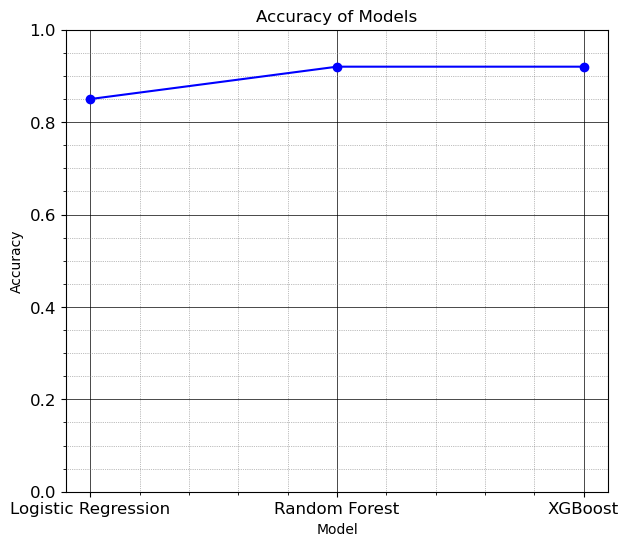

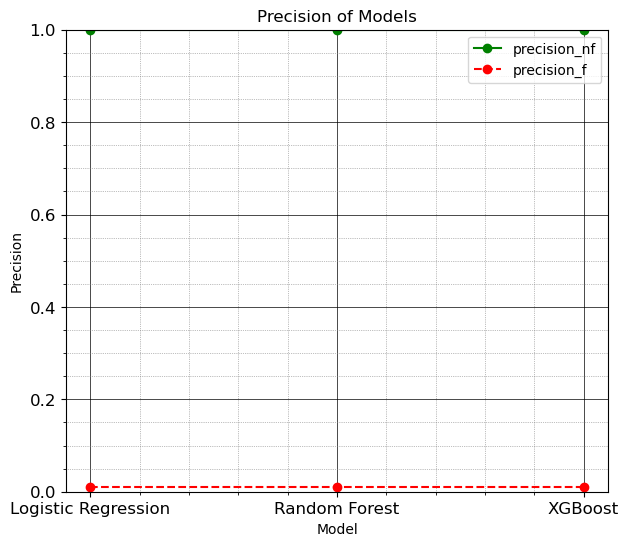

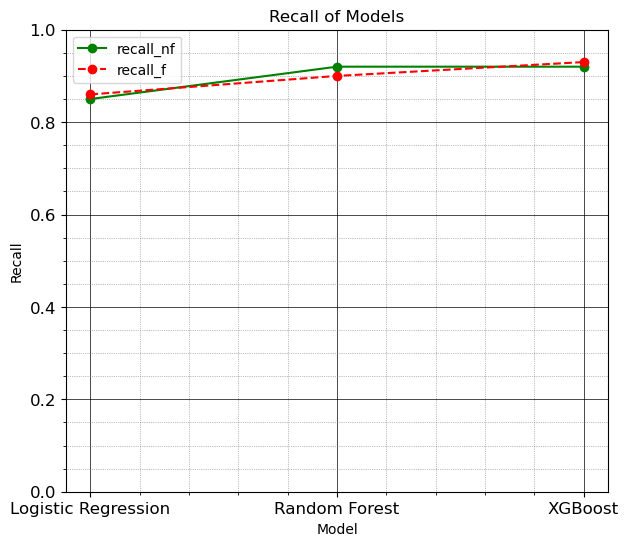

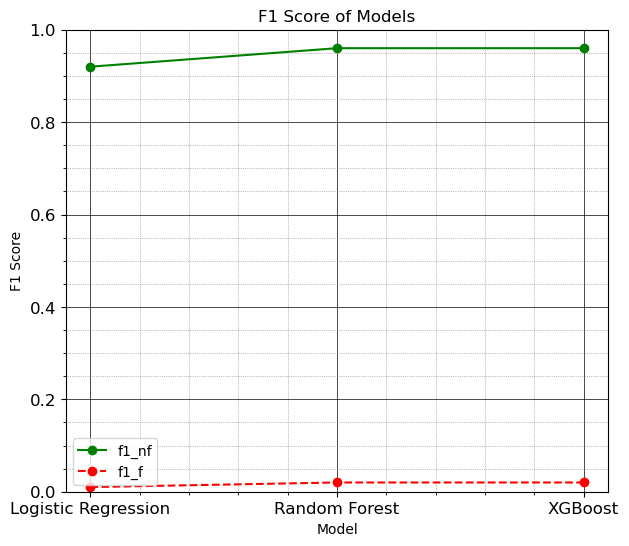

In [4]:
plt.rcParams['figure.figsize'] = [7, 6]  # Increase size by 1.5x

# Plot accuracy
plt.figure()
plt.plot(df['model'], df['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot precision
plt.figure()
plt.plot(df['model'], df['precision_nf'], marker='o', linestyle='-', color='g', label='precision_nf')
plt.plot(df['model'], df['precision_f'], marker='o', linestyle='--', color='r', label='precision_f')
plt.title('Precision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot recall
plt.figure()
plt.plot(df['model'], df['recall_nf'], marker='o', linestyle='-', color='g', label='recall_nf')
plt.plot(df['model'], df['recall_f'], marker='o', linestyle='--', color='r', label='recall_f')
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot f1 score
plt.figure()
plt.plot(df['model'], df['f1_nf'], marker='o', linestyle='-', color='g', label='f1_nf')
plt.plot(df['model'], df['f1_f'], marker='o', linestyle='--', color='r', label='f1_f')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()